# K- Nearest Neighbours Classification  

In [1]:
# getting the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from matplotlib import style
from collections import Counter
import random
style.use('fivethirtyeight')

In this notebook, we implement the algorithm from the basics. For the purpose of visualization, we will first test the model on 2-dimensional data points. Later, we employ the same model on the Iris Dataset.

In [2]:
# knn method (3 neighbors by default)
def knn(data,predict,k=3):
    
    # data is the training set 
    # predict is a single test data instance
    # k is number of nearest neighbors used for classification (user parameter)
    
    if len(data)>=k:
        warnings.warn('K is set to value less than total voting groups!')
    
    # distances stores distance and label of the training points from the test point
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance, group])
    
    # sort distances in increasing order and take the label of the least k among them
    votes = [i[1] for i in sorted(distances)[:k]]
    
    # find the label which occurs the most and proportion of the its occurence
    vote_result = Counter(votes).most_common(1)[0][0]
    confidence = Counter(votes).most_common(1)[0][1]/k
    return vote_result , confidence   

In [3]:
# train set
# 3 points each in 2 classes ('k': black, 'r':red)
dataset = {'k':[[1,2],[2,3],[3,1]] , 'r':[[6,5],[7,7],[8,6]]}

# test instance
new_features = [5,7]

result = knn(dataset,new_features,3)
print(result)

('r', 1.0)


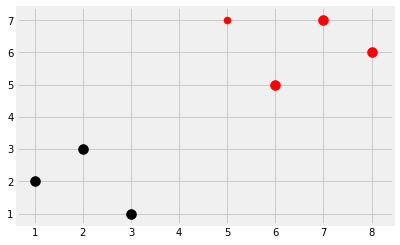

In [4]:
# plotting the points
[[plt.scatter(ii[0],ii[1],s=100,c=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0],new_features[1],s=50,c=result[0])

plt.show()

# Applying on Iris Dataset 

In [5]:
# importing the Iris Dataset
df = pd.read_csv('Iris.csv')
species = df['Species'].unique()
df.drop(['Id'],1,inplace=True)
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
# converting the dataframe to a list
full_data = df.values.tolist()

# shuffling the records
random.shuffle(full_data)

# splitting the dataset into train(80%) and test sets(20%)
test_size = 0.2
train_set = {species[0]:[],species[1]:[],species[2]:[]}
test_set = {species[0]:[],species[1]:[],species[2]:[]}
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]
#print(test_data)

for i in test_data:
    print(i[-1])
    test_set[i[-1]].append(i[:-1])
print(test_set)
#print(test_set)
for i in train_data:
    train_set[i[-1]].append(i[:-1])    

Iris-setosa
Iris-virginica
Iris-setosa
Iris-setosa
Iris-virginica
Iris-virginica
Iris-setosa
Iris-virginica
Iris-setosa
Iris-versicolor
Iris-virginica
Iris-setosa
Iris-virginica
Iris-setosa
Iris-virginica
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-setosa
Iris-versicolor
Iris-setosa
Iris-versicolor
Iris-setosa
Iris-virginica
Iris-versicolor
Iris-versicolor
Iris-setosa
Iris-versicolor
Iris-setosa
{'Iris-setosa': [[5.2, 4.1, 1.5, 0.1], [4.9, 3.1, 1.5, 0.1], [5.0, 3.0, 1.6, 0.2], [5.0, 3.4, 1.6, 0.4], [5.5, 4.2, 1.4, 0.2], [5.8, 4.0, 1.2, 0.2], [5.5, 3.5, 1.3, 0.2], [4.3, 3.0, 1.1, 0.1], [4.7, 3.2, 1.6, 0.2], [4.8, 3.0, 1.4, 0.3], [4.6, 3.2, 1.4, 0.2], [5.4, 3.4, 1.7, 0.2]], 'Iris-versicolor': [[6.4, 2.9, 4.3, 1.3], [6.8, 2.8, 4.8, 1.4], [6.3, 3.3, 4.7, 1.6], [5.5, 2.4, 3.8, 1.1], [6.7, 3.0, 5.0, 1.7], [6.0, 2.2, 4.0, 1.0], [5.5, 2.6, 4.4, 1.2], [6.3, 2.3, 4.4, 1.3], [5.8, 2.7, 3.9, 1.2], [6.2, 2.2, 4.5, 1.5]], 'Iris-virginica': [[7.4, 2.8, 6.1, 1.9], [6.3, 2.9, 5

Calculating the accuracy. Also displaying the confidence in case of incorrect prediction.

In [7]:
correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote, confidence = knn(train_set,data,k=5)
        if vote==group:
            correct +=1
        else:
            print(confidence)
        total +=1

print('Accuracy:',correct/total)

1.0
Accuracy: 0.9666666666666667
